In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
dataset_path ="/content/gdrive/MyDrive/SPAM text message 20170820 - Data.csv"

In [ ]:
import pandas as pd
df = pd.read_csv(dataset_path,encoding ="latin-1")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data Prepossing

In [ ]:
## check for null value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
## Encoding
df["Category"] = df["Category"].map({"ham":0,"spam":1})
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#CountVectorizer()

In [ ]:
df.Category.value_counts()
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
documents = ['Hello, how are you!', 'Win money, win from home.', 'Call me now.', 'Hello, Call hello you tomorrow?']

In [ ]:
count_vector.fit(documents)
print("Feature of documents",count_vector.get_feature_names_out())


Feature of documents ['are' 'call' 'from' 'hello' 'home' 'how' 'me' 'money' 'now' 'tomorrow'
 'win' 'you']


In [ ]:

doc_array = count_vector.transform(documents).toarray()
print("Frequency of features\n",doc_array)

feature_Freq= pd.DataFrame(doc_array,columns=count_vector.get_feature_names_out())
feature_Freq


Frequency of features
 [[1 0 0 1 0 1 0 0 0 0 0 1]
 [0 0 1 0 1 0 0 1 0 0 2 0]
 [0 1 0 0 0 0 1 0 1 0 0 0]
 [0 1 0 2 0 0 0 0 0 1 0 1]]


,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df["Message"],df["Category"],test_size=0.2,random_state=10)


In [ ]:
count_vector = CountVectorizer()

training_data = count_vector.fit_transform(x_train).toarray()

testing_data = count_vector.transform(x_test).toarray()

In [ ]:
training_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x_train

5281               And how you will do that, princess? :)
1300    Great to hear you are settling well. So what's...
5128    Wot about on wed nite I am 3 then but only til 9!
1808      Do have a nice day today. I love you so dearly.
856     Talk sexy!! Make new friends or fall in love i...
                              ...                        
1180                  To day class is there are no class.
3441                       What time you thinkin of goin?
1344    Crazy ar he's married. Ã like gd looking guys...
4623                They finally came to fix the ceiling.
1289                             Happy new year to u too!
Name: Message, Length: 4457, dtype: object

In [ ]:
y_train

5281    0
1300    0
5128    0
1808    0
856     1
       ..
1180    0
3441    0
1344    0
4623    0
1289    0
Name: Category, Length: 4457, dtype: int64

In [ ]:
df_transformed = pd.DataFrame(training_data, columns = count_vector.get_feature_names_out())
df_transformed.head()

,00,000,008704050406,0089,0121,01223585236,01223585334,02,0207,02072069400,...,zaher,zealand,zebra,zed,zeros,zhong,zoe,zogtorius,ãº1,ã¼
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes =  MultinomialNB()
naive_bayes.fit(training_data,y_train)

MultinomialNB()

In [ ]:
predictions = naive_bayes.predict(testing_data)

In [ ]:
## Compare result
result=pd.DataFrame({"Actual":y_test,"Predicted":predictions})
result

,Actual,Predicted
4635,0,0
2279,0,0
4545,0,0
5084,0,0
5298,0,0
...,...,...
2357,0,0
1174,0,0
192,0,0
3606,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
print("Accuracy score = {}".format(accuracy_score(y_test,predictions)))

print("Precision score = {}".format(precision_score(y_test,predictions)))

print("Recall score = {}".format(recall_score(y_test,predictions)))

print("F1 score = {}".format(f1_score(y_test,predictions)))

Accuracy score = 0.9838565022421525
Precision score = 0.9629629629629629
Recall score = 0.9090909090909091
F1 score = 0.935251798561151


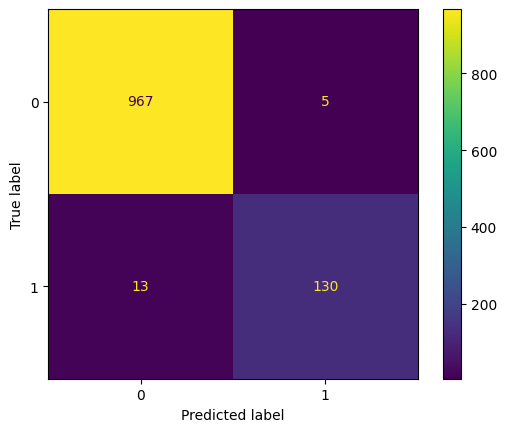

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=naive_bayes.classes_)
disp.plot()
plt.show()